In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

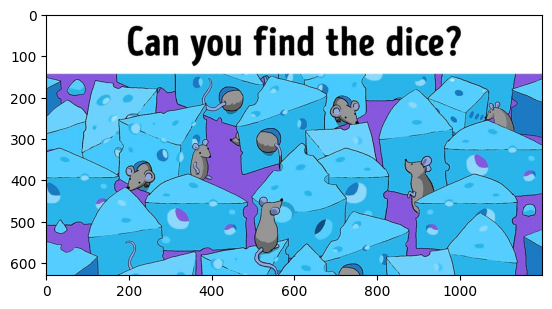

In [ ]:
image = cv2.imread(r"/content/drive/MyDrive/Xử lý ảnh/mouse.jpg")
plt.imshow(image)

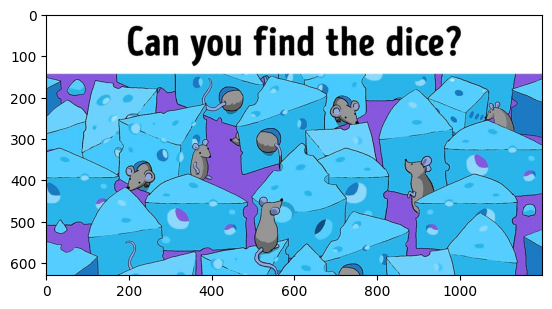

In [ ]:
output_image = image.copy()
plt.imshow(output_image)

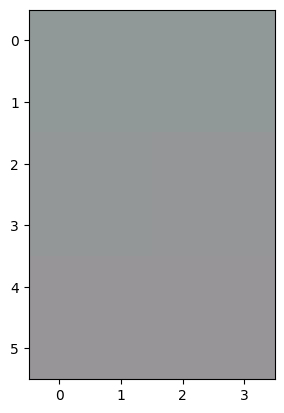

In [ ]:
template = cv2.imread(r'/content/drive/MyDrive/Xử lý ảnh/mouse_skin.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
plt.imshow(template_rgb)

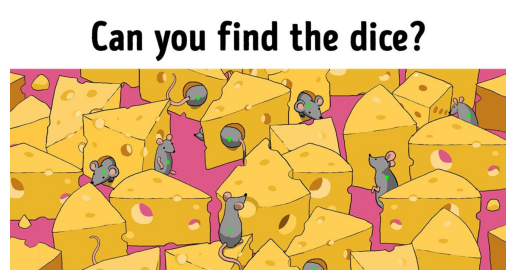

In [ ]:
# using a sliding window, calculate the norm difference between the image and the template based on color difference

template_h, template_w, _ = template_rgb.shape

result = np.zeros((image_rgb.shape[0] - template_h + 1, image_rgb.shape[1] - template_w + 1))

for y in range(result.shape[0]):
    for x in range(result.shape[1]):
        roi = image_rgb[y:y + template_h, x:x + template_w]
        distance = np.linalg.norm(roi - template_rgb)
        result[y, x] = distance

# normalize
result = cv2.normalize(result, None, 0, 1, cv2.NORM_MINMAX)

threshold = 0.76
loc = np.where(result >= threshold)

# group all rectangles that in a mouse
rectangles = []
for pt in zip(*loc[::-1]):
    rectangles.append([int(pt[0]), int(pt[1]), int(template_w), int(template_h)])

rectangles, _ = cv2.groupRectangles(rectangles, groupThreshold=1, eps=10)

for (x, y, w, h) in rectangles:
    cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
mouse_num = len(rectangles)
print(mouse_num)

9
